In [16]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

dtrain = {}
with open("Fotos/train/annotation.txt") as f:
    for line in f:
       (key, val) = line.split()
       dtrain[key] = val
#Fotos/test/annotation.txt
dtrain.pop('ImageID')
dtrainf = {}
dtrainnoms = {}

path='Fotos'
for(path,dirs,files) in os.walk(path):
    if path == 'Fotos/train/images': 
        for i in range(0,len(files)):
            nomf = str(files[i])
            lloc = nomf.find('.')
            nomf = nomf[0:lloc]
            dtrainf[i]=dtrain[nomf]

In [17]:
dval = {}
with open("Fotos/val/annotation.txt") as f:
    for line in f:
       (key2, val2) = line.split()
       dval[key2] = val2
dval.pop('ImageID')
dvalf = {}
dvalnoms = {}

path2='Fotos'
for(path2,dirs2,files2) in os.walk(path2):
    if path2 == 'Fotos/val/images': 
        for i in range(0,len(files2)):
            nomf2 = str(files2[i])
            lloc2 = nomf2.find('.')
            nomf2 = nomf2[0:lloc2]
            dvalf[i]=dval[nomf2]

In [18]:
pickle_in_ranks = open("ranksdense.pickle","rb")
ranks = pickle.load(pickle_in_ranks)

In [19]:
#Precisió

def precisio(offset, numb):

    contpr = 0
    ranks_q = ranks[offset,:]

    for j in range(0,numb):
        if(dvalf[offset]=='desconegut'):
            print("Aquest es un distractor")
            break
        elif(dvalf[offset]==dtrainf[ranks_q[j]]):
            contpr+=1
        #print(dtrainf[ranks_q[j]])

    return contpr/numb;

precisio(0,15)

1.0

In [20]:
#Recall

def recall(offset):
    numrell = 0
    contre = 0
    ranks_q = ranks[offset,:]

    for t in range(0, len(dtrainf)):
        if(dvalf[offset]==dtrainf[t]):
            numrell+=1

    for j in range(0,numrell):
        if(dvalf[offset]=='desconegut'):
            print("Aquest es un distractor")
            break
        elif(dvalf[offset]==dtrainf[ranks_q[j]]):
            contre+=1
        #print(dtrainf[ranks_q[j]])

    return contre/numrell

recall(4)

0.6486486486486487

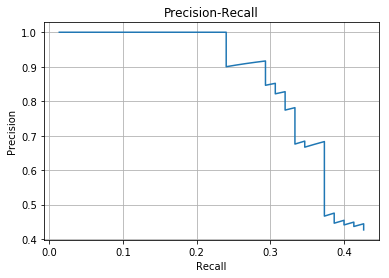

In [21]:
from math import *
from numpy import *
from pylab import *

offset = 0

prec = []
reca = []
contfin = 0
busqueda = 0
ranks_q = ranks[offset,:]

for t in range(0, len(dtrainf)):
        if(dvalf[offset]==dtrainf[t]):
            busqueda+=1
            
for n in range(0, busqueda):
    if(dvalf[offset]==dtrainf[ranks_q[n]]):
            contfin+=1
    prec.append(contfin/(n+1))
    reca.append(contfin/busqueda)

p1 = plot(reca, prec)

grid()
title('Precision-Recall')
xlabel('Recall')
ylabel('Precision')

show()

In [22]:
#Calcul AP
def AP(offset):
    contrell = 0
    precont = 0
    numrell = 0
    ranks_q = ranks[offset,:]
    
    for t in range(0, len(dtrainf)):
        if(dvalf[offset]==dtrainf[t]):
            numrell+=1

    for j in range(0,numrell):
        if(dvalf[offset]==dtrainf[ranks_q[j]]):
            contrell+=1
            precont+=contrell/(j+1)

    return precont/numrell

AP(4)

0.5814849709623935

In [23]:
#Calcul MAP
contmap = 0
numcons = 0

for d in range(0, len(dvalf)):
    if(dvalf[d]!='desconegut'):
        contmap+=AP(d)
        numcons+=1

MAP = contmap/numcons
print(MAP)

0.3915344743654898


In [24]:
len(dvalf)

477

In [25]:
#Calcul accuracy total

acc = 0;
contac = 0;

for q in range(0, len(dvalf)):
    if(dvalf[q]!='desconegut'):
        acc+=recall(q)
        contac+=1

accuracy = acc/contac
print(accuracy)

0.4631604306256113


In [26]:
import pickle

#tutorial: https://www.youtube.com/watch?v=2Tw39kZIbhs

pickle_in_val = open("valfoto.pickle","rb")
valfoto = pickle.load(pickle_in_val)

pickle_in_train = open("trainfoto.pickle","rb")
trainfoto = pickle.load(pickle_in_train)

farmacia_albinyana


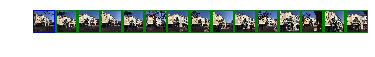

In [27]:
from PIL import Image, ImageOps

# get the original images for visualization
x_train_images = trainfoto
x_val_images = valfoto

h,w = (224+30, 224+30)
new_image= Image.new('RGB', (h*15,w))

# Visualize ranks of the 10 queries
offset = 0 # it will show results from query #'offset' to #offset+10
ranks_q = ranks[offset,:]
print(dvalf[offset])
ima_q = Image.fromarray(x_val_images[offset])
ima_q = ImageOps.expand(ima_q, border=15, fill='blue')
new_image.paste(ima_q, (0,0))

new_image.paste( Image.fromarray(x_train_images[ranks_q[0]]), (h*(2),0))

for b in range(0,14):
    if(dvalf[offset]==dtrainf[ranks_q[b]]):
        ima_q = Image.fromarray(x_train_images[ranks_q[b]])
        ima_q = ImageOps.expand(ima_q, border=15, fill='green')
        new_image.paste(ima_q, (h*(b+1),0))
    else:
        ima_q = Image.fromarray(x_train_images[ranks_q[b]])
        ima_q = ImageOps.expand(ima_q, border=15, fill='red')
        new_image.paste(ima_q, (h*(b+1),0))

plt.imshow(new_image)
plt.axis('off')
plt.show()
new_image.save('Cercaindiv.jpg')

In [28]:
def creadict():
    dcrea ={}
    dcrea["catedral"]=0
    dcrea["escola_enginyeria"]=0
    dcrea["estacio_nord"]=0
    dcrea["dona_treballadora"]=0
    dcrea["mnactec"]=0
    dcrea["castell_cartoixa"]=0
    dcrea["teatre_principal"]=0
    dcrea["ajuntament"]=0
    dcrea["masia_freixa"]=0
    dcrea["mercat_independencia"]=0
    dcrea["farmacia_albinyana"]=0
    dcrea["societat_general"]=0
    dcrea["desconegut"]=0
    return dcrea

In [29]:
dtot ={}
dtot["catedral"]={}
dtot["escola_enginyeria"]={}
dtot["estacio_nord"]={}
dtot["dona_treballadora"]={}
dtot["mnactec"]={}
dtot["castell_cartoixa"]={}
dtot["teatre_principal"]={}
dtot["ajuntament"]={}
dtot["masia_freixa"]={}
dtot["mercat_independencia"]={}
dtot["farmacia_albinyana"]={}
dtot["societat_general"]={}
for key, value in dtot.items():
    dtot[key]=creadict()

In [31]:
for w in range(0,len(dvalf)):
    if dvalf[w]!="desconegut":
        dtot[dvalf[w]][dtrainf[ranks[w][0]]]+=1

In [32]:
w, h = 14, 13;
Matrix = [[0 for x in range(w)] for y in range(h)]

contx = 1
conty = 1


for key,values in sorted(dtot.items()):
    for key2, values2 in sorted(dtot[key].items()):
        Matrix[contx][conty]=values2
        conty+=1
    conty=1
    contx+=1
    
contx = 1
conty = 1

prova = creadict()

for key,values in sorted(prova.items()):
    Matrix[0][conty]=key
    conty+=1

for key,values in sorted(dtot.items()):
    Matrix[contx][0]=key
    contx+=1
    
Matrix[0][0]='Matriz de Conf.'

In [33]:
Matrix

[['Matriz de Conf.',
  'ajuntament',
  'castell_cartoixa',
  'catedral',
  'desconegut',
  'dona_treballadora',
  'escola_enginyeria',
  'estacio_nord',
  'farmacia_albinyana',
  'masia_freixa',
  'mercat_independencia',
  'mnactec',
  'societat_general',
  'teatre_principal'],
 ['ajuntament', 29, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 ['castell_cartoixa', 0, 29, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 ['catedral', 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['dona_treballadora', 0, 0, 0, 0, 27, 0, 0, 0, 0, 0, 2, 0, 0],
 ['escola_enginyeria', 0, 0, 0, 1, 0, 28, 0, 0, 0, 1, 0, 0, 0],
 ['estacio_nord', 0, 0, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0],
 ['farmacia_albinyana', 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0],
 ['masia_freixa', 0, 0, 0, 0, 0, 1, 0, 0, 29, 0, 0, 0, 0],
 ['mercat_independencia', 0, 0, 0, 1, 0, 0, 1, 1, 0, 26, 0, 1, 0],
 ['mnactec', 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 28, 0, 1],
 ['societat_general', 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 29, 0],
 ['teatre_principal', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
import csv
with open('MatrizConf.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, delimiter=',')
     wr.writerows(Matrix)

In [35]:
#Accuracy

def accuracy(diction):
    nume=0
    denom=0
    for key,values in sorted(dtot.items()):
        for key2, values2 in sorted(dtot[key].items()):
            denom+=values2
            if key==key2:
                nume+=values2
    return nume/denom

In [36]:
accuracy(dtot)

0.9610027855153204